# **Predicting Lung Disease Unsing Deep Learning**

#### Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
# Import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

# we will create generic code which can be used for other base model as well
# from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
val_path = 'Datasets/val'

In [3]:
# Import the Vgg16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # add image size and remove last layer to the binary classes

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes in order to know how many output to expect
folders = glob("Datasets/train/*")

In [6]:
# our layers - you can add more if you want 
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction) #create a model with vgg as input and output as prediction

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
# Use the Image DataGenerator to import the images from the datasets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 624 images belonging to 2 classes.


# If you are using `ImageDataGenerator` then you have to use `fit_generator`

In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\frank\AppData\Local\Temp\ipykernel_2876\629404327.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 1428s 9s/step - loss: 0.1870 - accuracy: 0.9241 - val_loss: 0.2574 - val_accuracy: 0.9071
Epoch 2/5
163/163 [==============================] - 1391s 9s/step - loss: 0.1166 - accuracy: 0.9534 - val_loss: 0.4383 - val_accuracy: 0.8125
Epoch 3/5
163/163 [==============================] - 1164s 7s/step - loss: 0.1133 - accuracy: 0.9592 - val_loss: 0.2688 - val_accuracy: 0.9199
Epoch 4/5
163/163 [==============================] - 1146s 7s/step - loss: 0.0765 - accuracy: 0.9734 - val_loss: 0.2354 - val_accuracy: 0.9247
Epoch 5/5
163/163 [==============================] - 1161s 7s/step - loss: 0.0812 - accuracy: 0.9703 - val_loss: 0.3049 - val_accuracy: 0.9087


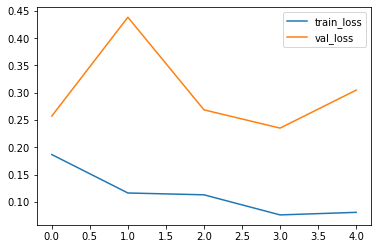

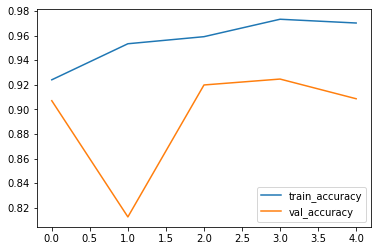

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

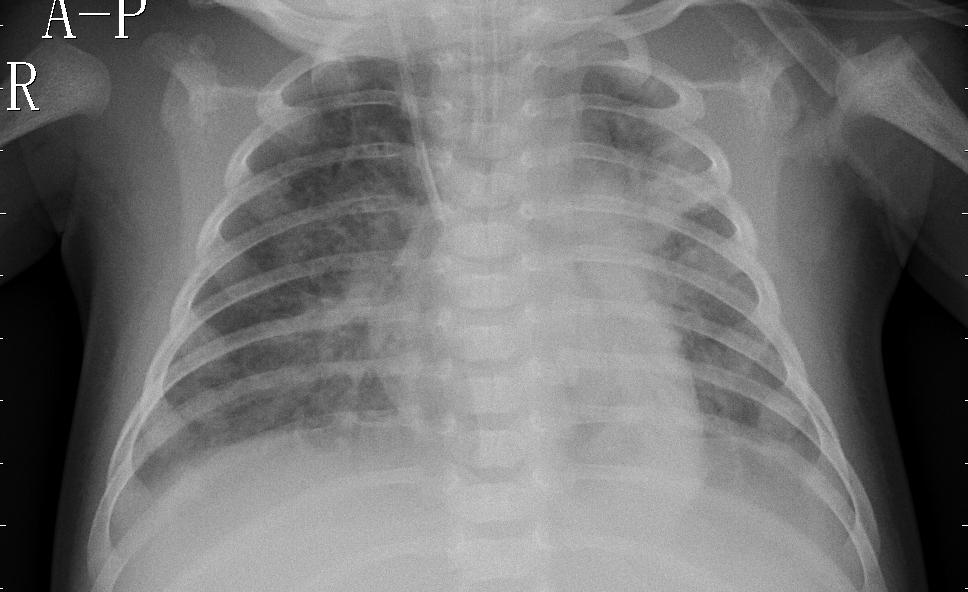

In [36]:
from IPython.display import display
from PIL import Image

NeumonialPath = "Datasets/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
NormalPath = "Datasets/val/NORMAL/NORMAL2-IM-1427-0001.jpeg"
display(Image.open(NeumonialPath))

In [37]:
from tensorflow.keras.models import load_model
from keras.utils import load_img, img_to_array
import numpy as np

model = load_model('model_vgg16.h5')

img = load_img(NormalPath, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)
if classes[0][0] > classes[0][1]:
    print('X-Ray image is NORMAL')
else:
    print('X-Ray image is having PNEUMONIAL')

1/1 [==============================] - 0s 295ms/step
[[1.000000e+00 1.624395e-20]]
X-Ray image is NORMAL
